## In this file a "layered" NK model is generated and its properties are examined.
The layered NK model consists of a landscape consisting of a weighted average of other NK Landscapes 


In [46]:
##First Load in potentially relevant packages
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator


In [151]:
###Define Some key functions
## Generate a random position on Landscape
##INPUTS
#N - N 
def Position_rand(N):
    Pos = (np.random.rand(N)>0.5)
    Pos = Pos.astype(int)
    #Position = np.repeat(Pos,N)
    #Position = np.full((N, N), Pos, dtype=int)
    #return(Position[1])
    return(Pos)

#### get_fitness_One_Landscape Fitness
# This function gets the fitness averaged across the N variables for a given position
# on a single "unlayered" Landscape
###Inputs:
###Landscape - Landscape Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness
def Get_Fitness_One_Landscape(Landscape,Position):
    N=len(Landscape)
    totalFitness = 0
    K=int(np.log2(len(Landscape[0]))-1)
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape[currIndex,interactIndex]
    return(totalFitness/N)

###Using autocorr, make a function that inputs the number of steps (lag range) to compute autocorrelation for
###Inputs:
#TimeData: Time Series of Fitness
#lag_range: Maximum number of steps to calculate correlation over
def Get_AR(TimeData, lag_range):
    #convert to tome series
    s = pd.Series(TimeData)
    AR=[]
    #loop over ranges
    for r in range(lag_range):
        AR.append(s.autocorr(lag=r))
    return(AR)


## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker(Steps, initPosition, Landscape):
    #Get N
    N=len(Landscape)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=Get_Fitness_One_Landscape(Landscape,currPosition)
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,Get_Fitness_One_Landscape(Landscape,currPosition))

    return(FitnessHistory)



In [146]:
#### Get_Fitness_Layered_Landscape
# This function gets the fitness averaged 2 landscapes (hence layering)
###Inputs:
###Landscape1 - Landscape1 Values
###Landscape2 - Landscape1 Values
###Weights - Vector of weights <w_1,w_2> to average fitness over the two landscapes
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness over the two landscapes
def Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, Position):
    ##First get the fitness for the first landscape
    N=len(Landscape1)
    K=int(np.log2(len(Landscape1[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape1[currIndex,interactIndex]
    Landscape1Fitness = totalFitness/N

 ##Now get the fitness for the first landscape
    N=len(Landscape2)
    K=int(np.log2(len(Landscape2[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape2[currIndex,interactIndex]
    Landscape2Fitness = totalFitness/N
    
    ##Now return the weighted average as a  scalar
    #print(np.dot(np.array([Landscape1Fitness,Landscape2Fitness]),Landscape_Weights , out=None))
    return(np.dot(np.array([Landscape1Fitness,Landscape2Fitness]),Landscape_Weights , out=None))


In [147]:
##define A random walker over the layered landscape

## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker_layered(Steps, initPosition, Landscape1, Landscape2, Landscape_Weights):
    #Get N
    N=len(Landscape1)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, currPosition)
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, currPosition))

    return(FitnessHistory)


In [148]:
#### Get_Fitness_Layered_Landscape_Alternative
# This function gets the fitness by multiplying the fitness from two landscapes
##the intuition is E[X*Y] = E[X]*E[Y] since independent, if E[X]=E[Y]=1 then E[X*Y]=E[X]=E[Y]
##induce equality by adding 0.5 to fitness so E[X]=E[Y]=1


###Inputs:
###Landscape1 - Landscape1 Values
###Landscape2 - Landscape1 Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness over the two landscapes
def Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, Position):
    ##First get the fitness for the first landscape
    N=len(Landscape1)
    K=int(np.log2(len(Landscape1[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape1[currIndex,interactIndex]
    Landscape1Fitness = totalFitness/N 

 ##Now get the fitness for the first landscape
    N=len(Landscape2)
    K=int(np.log2(len(Landscape2[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape2[currIndex,interactIndex]
    Landscape2Fitness = totalFitness/N
    
    ##Now return the weighted average as a  scalar
    #print(np.dot(np.array([Landscape1Fitness,Landscape2Fitness]),Landscape_Weights , out=None))
    return((Landscape2Fitness+0.5)*(Landscape1Fitness+0.5))


In [149]:
##define A random walker over the alternative layered landscape

## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker_layered_alternative(Steps, initPosition, Landscape1, Landscape2):
    #Get N
    N=len(Landscape1)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, currPosition)
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, currPosition))

    return(FitnessHistory)


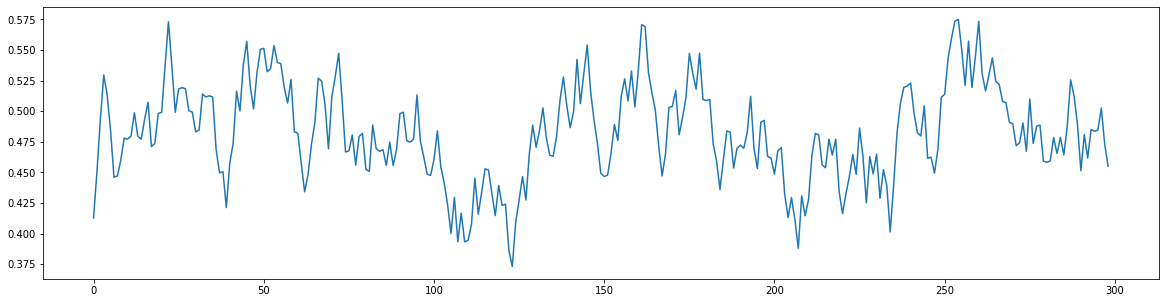

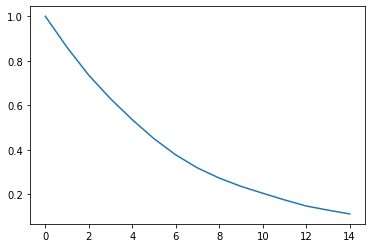

The standard deviation is 0.04371740162261828


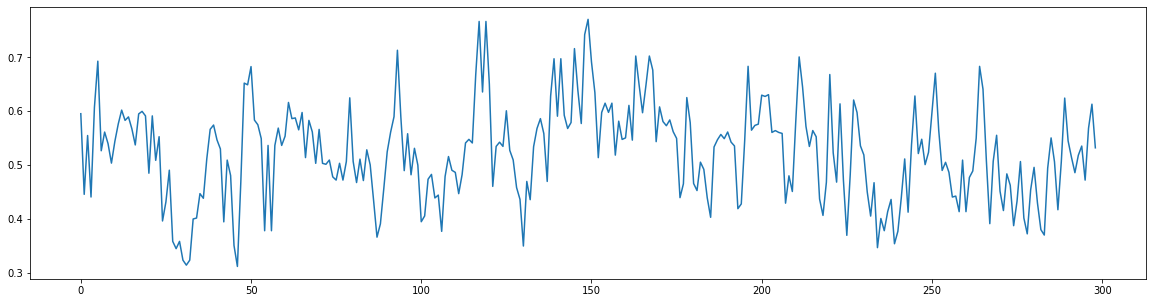

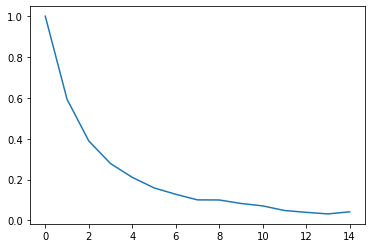

The standard deviation is 0.0793951448334595


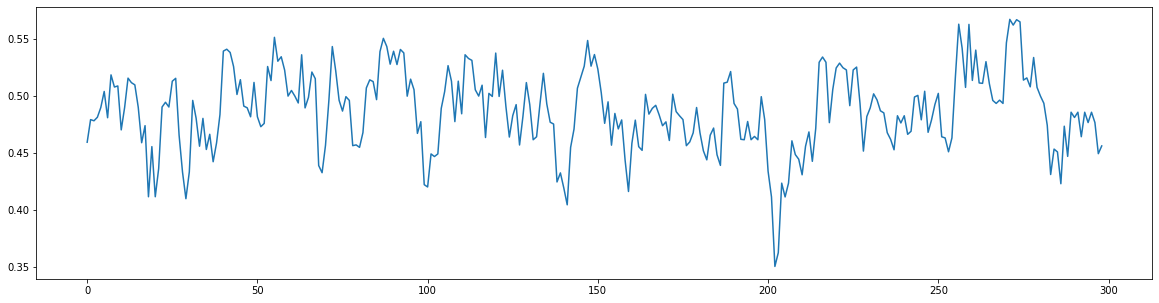

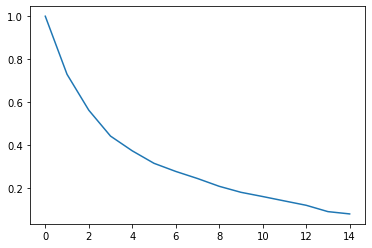

The standard deviation is 0.0388377275929638


In [160]:
##Generate two NK Landscapes and define weights

##Generate NK Landscape 1
N = 15
K1 = 0 
NK_land_1 = np.random.rand(N, 2**(K1+1))

##Generate NK Landscape 2
N = 15
K2 = 5
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)

Weights =np.array([1,0])


numSteps=5000
FitnessPath = random_walker_layered(numSteps,iPosition,NK_land_1,NK_land_2,Weights)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again

Weights =np.array([0,1])


FitnessPath = random_walker_layered(numSteps,iPosition,NK_land_1,NK_land_2,Weights)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again

Weights =np.array([.66,.34])


FitnessPath = random_walker_layered(numSteps,iPosition,NK_land_1,NK_land_2,Weights)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

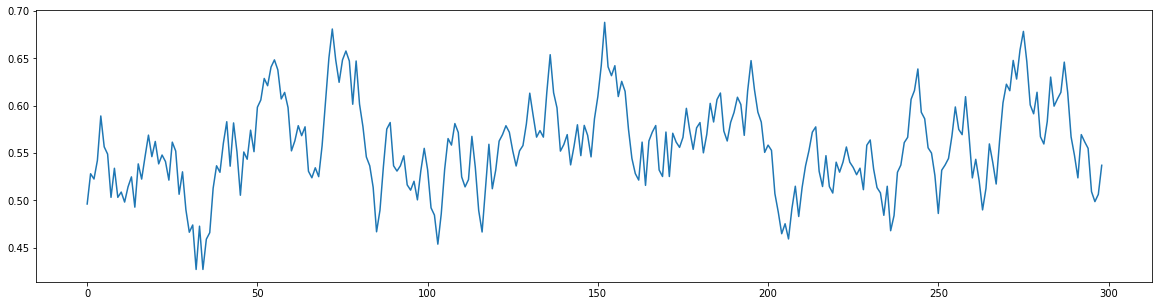

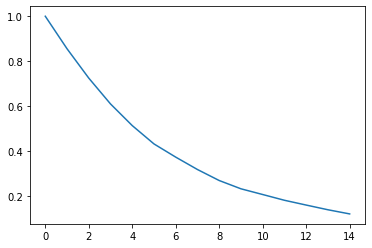

The standard deviation is 0.050452057420612664


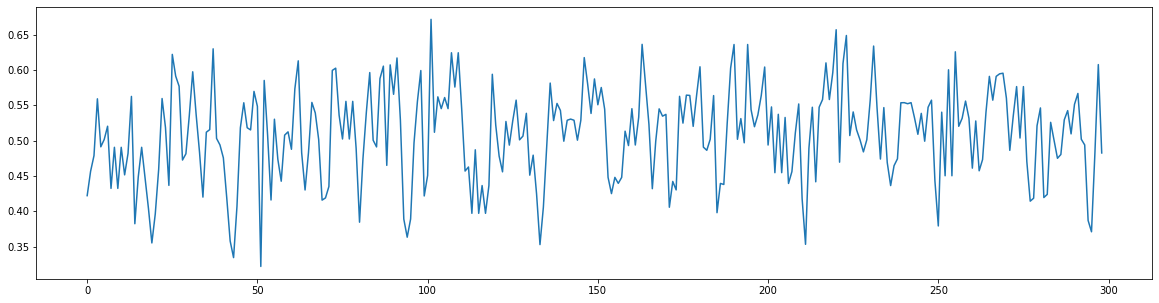

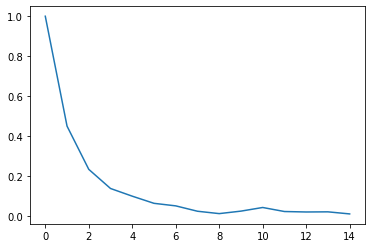

The standard deviation is 0.07414471563126872


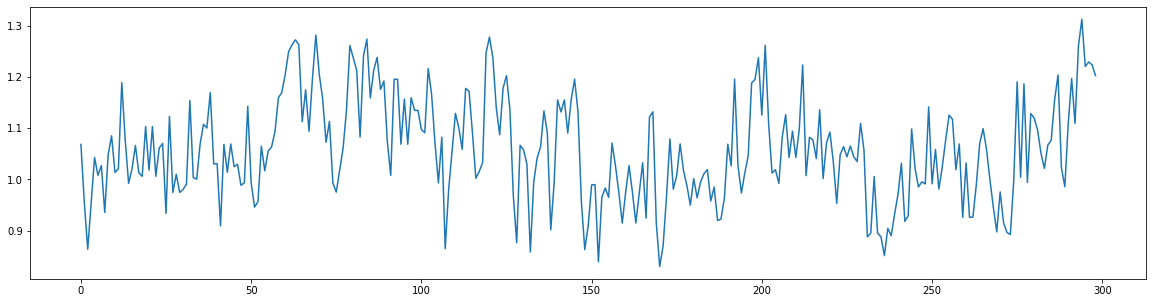

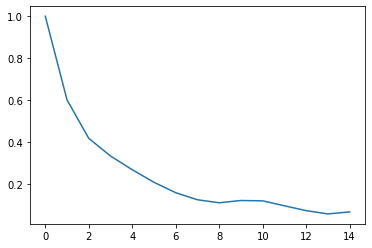

The standard deviation is 0.09611861023366322


In [159]:
##Now plot the alternative Landscape
##Generate two NK Landscapes and define weights

##Generate NK Landscape 1
N = 15
K1 = 0 
NK_land_1 = np.random.rand(N, 2**(K1+1))

##Generate NK Landscape 2
N = 15
K2 = 7
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)

Weights =np.array([1,0])


numSteps=5000
FitnessPath =random_walker(numSteps, iPosition, NK_land_1)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again


FitnessPath = random_walker(numSteps, iPosition, NK_land_2)


##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again

Weights =np.array([.5,.5])


FitnessPath = random_walker_layered_alternative(numSteps,iPosition,NK_land_1,NK_land_2)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

0.6523999692559861


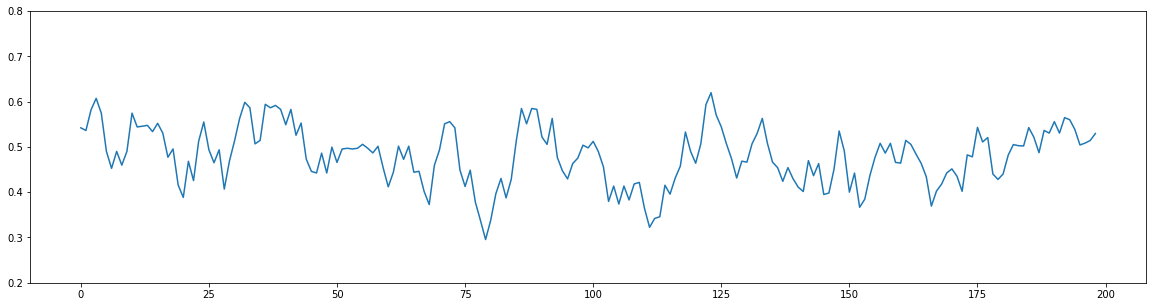

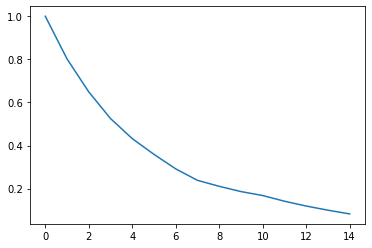

The standard deviation is 0.06388975926165864
0.7575835371789974


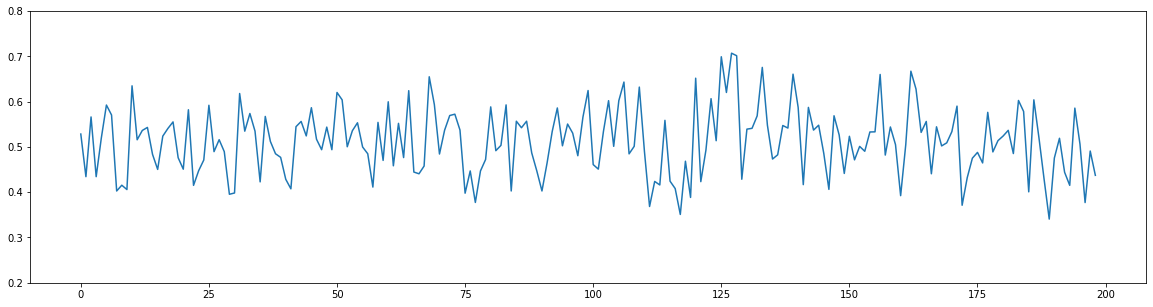

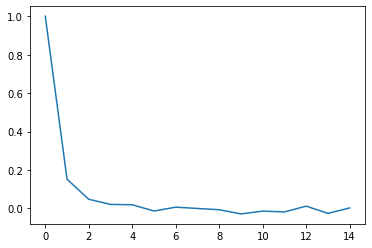

The standard deviation is 0.07495045601519712


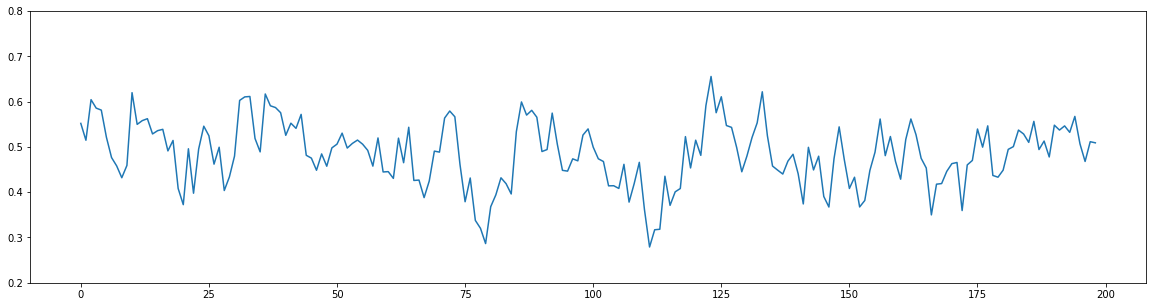

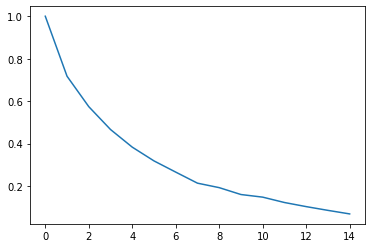

The standard deviation is 0.06870803208226495


In [186]:
##Another series, but this time just add
##Now plot the alternative Landscape
##Generate two NK Landscapes and define weights

##Generate NK Landscape 1
N = 15
K1 = 2 
NK_land_1 = np.random.rand(N, 2**(K1+1))

##Generate NK Landscape 2
N = 15
K2 = 12
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)

Weights =np.array([1,0])


numSteps=5000
FitnessPath1 =random_walker(numSteps, iPosition, NK_land_1)
print(max(FitnessPath1))

##plot the data
plt.figure(figsize=(20,5))
plt.ylim(.2, .8)
plt.plot(FitnessPath1[1:200])
plt.show()
plt.plot(Get_AR(FitnessPath1,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath1)**.5)

##Now alter weights and plot again


FitnessPath2 = random_walker(numSteps, iPosition, NK_land_2)
print(max(FitnessPath2))


##plot the data
plt.figure(figsize=(20,5))
plt.ylim(.2, .8)
plt.plot(FitnessPath2[1:200])
plt.show()
plt.plot(Get_AR(FitnessPath2,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath2)**.5)

FitnessPath3 = FitnessPath1+0.333*(FitnessPath2-np.mean(FitnessPath2))


##plot the data
plt.figure(figsize=(20,5))
plt.ylim(.2, .8)
plt.plot(FitnessPath3[1:200])
plt.show()
plt.plot(Get_AR(FitnessPath3,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath3)**.5)